# **Pred2Town - Version 1.1 - Git**

Note: The analyzes presented here are part of the research entitled "Prediction of Homicides in Urban Centers: A Machine Learning Approach", published in IntelliSys 2021. Git link: https://github.com/josesousaribeiro/Pred2Town.

All the code components below, can be executed for a better understanding of the processes carried out in that research.

# **Analyzes**

## - Libs:

In [2]:
!pip install shap
!pip install eli5
!pip install lime
!pip install venn
!pip install scikit_posthocs
!pip install catboost



from scipy.stats import friedmanchisquare
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from folium.features import DivIcon

from decimal import Decimal 


from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from matplotlib.pyplot import subplots
from venn import venn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
import shap
import eli5
import lime 
import lime.lime_tabular 
import pandas as pd
import csv
import io
import numpy as np
import seaborn as sns; sns.set()
import scikit_posthocs as sp
import pickle
import pandas as pd
import folium

import math
import matplotlib.pyplot as plt

import lightgbm as lgb
import catboost as cb





     |████████████████████████████████| 358kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489397 sha256=eefb6c69e2bd5830c73c0ff01227dfb13fe7cb9e3f3cedf41b5e37d2c2ee2fd2
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap
     |████████████████████████████████| 112kB 5.7MB/s 
     |████████████████████████████████| 276kB 5.6MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=1622227c6c4df84909d801dd1a53b029212634dedbd433dfa390b6e4b38fc1cd
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
  Created wheel for venn: filename=venn-0.1.3-cp36-none-any.whl size=19701 sha256=2dbcac2810f1091910b4bdc8d17001d6876c30a2145bcdc279218282ad6a3006
  Stored in directory: /root/.cache/pip/wheels/41/e4/83/4269e8fb3c81b09363ebe355c373b14b0b947394d2af541734
Successful

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


## Global params to execution:

In [81]:

name_dataset = 'dataset_pred2town_bel.csv'
name_target_class = 'Class'

dt = {'info_gain_ent':[],
        'feat_imp_oob':[],
        'shap_rf':[],
        'shap_xgb':[],
        'shap_gb':[],
        'shap_dt':[],
        'eli5_rf':[],
        'eli5_xgb':[],
        'eli5_gb':[],
        'eli5_dt':[]}

df_Pred2Town_feature_rank = pd.DataFrame(dt)


# If false, upload the templates to the google colab path in order to locate each model to be reused.
# If true, grid search will be performed and new best models will be located automatically.
run_grid_search_cb = False
run_grid_search_lgbm = False
run_grid_search_rf = False
run_grid_search_xgb = False
run_grid_search_gb = False
run_grid_search_lr = False
run_grid_search_dt = False
run_grid_search_knn = False
run_grid_search_nb = False
run_grid_search_nn = False
run_grid_search_svm = False


cv_grid_search = 7 
crossvalidation = 7



## - Import dataset: dataset_pred2town_bel.csv


In [9]:
#please upload file dataset_pred2town_bel.csv 
print("Note: upload file dataset_pred2town_bel.csv")
uploaded1 = files.upload()
df = pd.read_csv(io.BytesIO(uploaded1[name_dataset]), encoding="UTF-8", sep=";")

Saving dataset_pred2town_bel.csv to dataset_pred2town_bel (3).csv


In [10]:
df

,mes_num_crb,quant_lesao_corporal_crb,quant_ameaca_crb,quant_roubo_crb,quant_injuria_crb,quant_furto_crb,quant_lesao_no_transito_crb,quant_dano_no_transito_crb,quant_difamacao_crb,quant_homicidio_crb,quant_abandono_do_lar_crb,quant_conflitos_vicinais_crb,quant_conflitos_conjugais_crb,quant_fuga_do_lar_crb,quant_estupro_de_vulneravel_crb,quant_outros_fatos_atipicos_crb,quant_roubo_de_veiculo_crb,quant_estelionato_crb,quant_dano_crb,quant_dano_civil_crb,quant_calunia_crb,quant_conflitos_familiares_crb,quant_trafico_de_drogas_crb,quant_vias_de_fato_crb,quant_apropriacao_indebita_crb,quant_agressao_fisica_crb,quant_receptacao_crb,quant_estupro_crb,quant_desaparecimento_de_pessoa_crb,quant_tentativa_de_homicidio_crb,quant_poluicao_sonora_crb,quant_outras_fraudes_crb,quant_desobediencia_crb,quant_desacato_crb,quant_perturbacoes_da_tranquilidade_crb,Class
0,1.0,0.000000,0.048193,0.002433,0.00000,0.020619,0.000000,0.000000,0.000000,0.071429,0.1,0.000000,0.000000,0.0,0.000000,0.011111,0.000000,0.000000,0.000000,0.018868,0.0000,0.071429,0.000000,0.0000,0.0,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
1,1.0,0.081633,0.084337,0.124088,0.03125,0.036082,0.233333,0.000000,0.000000,0.071429,0.1,0.222222,0.142857,0.0,0.000000,0.022222,0.000000,0.030303,0.000000,0.037736,0.0625,0.142857,0.000000,0.0625,0.2,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,1
2,1.0,0.000000,0.132530,0.063260,0.03125,0.018041,0.066667,0.027027,0.000000,0.000000,0.0,0.111111,0.000000,0.0,0.000000,0.000000,0.000000,0.030303,0.000000,0.018868,0.0625,0.000000,0.000000,0.0625,0.1,0.000000,0.000000,0.0,0.2,0.0,0.000000,0.0,0.166667,0.0,0.125,1
3,1.0,0.183673,0.168675,0.141119,0.06250,0.126289,0.100000,0.027027,0.000000,0.000000,0.2,0.000000,0.000000,0.0,0.000000,0.066667,0.000000,0.030303,0.000000,0.056604,0.1250,0.142857,0.083333,0.1250,0.3,0.111111,0.000000,0.0,0.4,0.0,0.000000,0.0,0.166667,0.4,0.125,0
4,1.0,0.040816,0.012048,0.017032,0.00000,0.038660,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,12.0,0.306122,0.289157,0.141119,0.15625,0.118557,0.100000,0.060811,0.166667,0.071429,0.0,0.000000,0.142857,0.0,0.166667,0.200000,0.057143,0.030303,0.235294,0.018868,0.0625,0.214286,0.416667,0.3750,0.0,0.111111,0.000000,0.0,0.2,0.2,0.000000,0.0,0.000000,0.0,0.000,0
2000,12.0,0.183673,0.277108,0.192214,0.28125,0.381443,0.366667,0.506757,0.222222,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.311111,0.171429,0.333333,0.411765,0.283019,0.3750,0.214286,0.000000,0.4375,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000,0
2001,12.0,0.040816,0.012048,0.043796,0.00000,0.015464,0.000000,0.047297,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.028571,0.030303,0.000000,0.018868,0.0000,0.000000,0.083333,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0
2002,12.0,0.040816,0.060241,0.075426,0.06250,0.090206,0.066667,0.243243,0.166667,0.071429,0.1,0.000000,0.142857,0.0,0.000000,0.100000,0.000000,0.000000,0.176471,0.000000,0.1875,0.000000,0.083333,0.0000,0.1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000,0



## - Split de Train/Test

In [11]:
np.random.seed(0)
# Set target value and others features.
y_feature_name = name_target_class

Y = (df[y_feature_name].astype(int))

x_features_names = list(df.head(0))
x_features_names.remove(name_target_class)
X =  df[x_features_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) # 70% training and 30% tes




In [12]:
X_train.to_csv("X_train.csv")
files.download("X_train.csv")

X_test.to_csv("X_test.csv")
files.download("X_test.csv")

y_train.to_csv("y_train.csv")
files.download("y_train.csv")

y_test.to_csv("y_test.csv")
files.download("y_test.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Class stratification

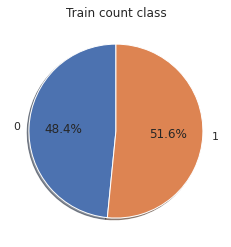

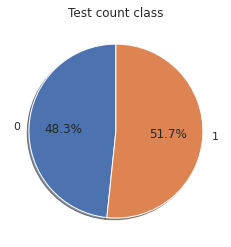

In [13]:

title = 'Train count class'
labels = [0,1]
sizesTrain = [y_train.to_list().count(0), y_train.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTrain, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

title = 'Test count class'
labels = [0,1]
sizesTest = [y_test.to_list().count(0), y_test.to_list().count(1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizesTest, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title(title)
plt.show()

In [14]:
print(df[y_feature_name].to_list().count(0))
print(df[y_feature_name].to_list().count(1))

970
1034


## - Train, test and algorithm analysis

### LightGBM - Create a GridSearch to identify the best classify

In [32]:
filename = 'best_model_lgbm.sav'

if run_grid_search_lgbm == True:
  # Create the parameter grid
  # https://lightgbm.readthedocs.io/en/latest/Parameters.html
  param_grid = {
          'learning_rate': [0.1, 0.5],
          'max_depth': [1, 6, 12],
          'bootstrap': [True, False],
          'n_estimators': [10, 100, 200],
		      'min_data_in_leaf': [1, 10, 20, 40],
          'boosting_type': ['gbdt','dart','goss','rf'],
          'num_leaves': [31,100,200]
          }
  
  model_lgbm = lgb.LGBMClassifier(objective='binary')

  grid_search = GridSearchCV(estimator=model_lgbm, 
                             param_grid=param_grid,  
                             cv=StratifiedKFold(cv_grid_search), 
                             n_jobs = 3, verbose = 2,
                             scoring = 'roc_auc')
  
  
  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_lgbm = grid_search.best_estimator_
  
  #save
  pickle.dump(model_lgbm, open(filename, 'wb'))
  files.download(filename)
else: 
  model_lgbm = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_lgbm)
y_pred_lgbm = model_lgbm.predict(X_test)



Parameters of best model:
LGBMClassifier(boosting_type='goss', bootstrap=True, class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=1, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=40, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


LGBM - Accuracy, precision and Recall.

In [33]:
y_pred = y_pred_lgbm
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys



,Accuracy,Precision,Recall
0,0.754153,0.768977,0.749196


LGBM - Confusion matrix

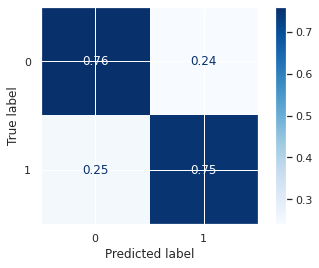

In [34]:
plot_confusion_matrix(model_lgbm, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

**LGBM** - Statistical analisys

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


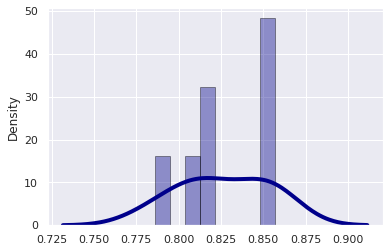

In [35]:
#del dataframe_analisys
hit_rates = cross_val_score(model_lgbm, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_lgbm = hit_rates

### CatBoost - Create a GridSearch to identify the best classify

In [36]:
filename = 'best_model_cb.sav'

if run_grid_search_cb == True:
 #parameters
 #https://catboost.ai/docs/concepts/parameter-tuning.html
  param_grid = {
            'learning_rate':[0.1, 0.5], 
            'depth':[1, 6, 12],
            'iterations':[10, 100, 200],
            'grow_policy':['SymmetricTree','Depthwise','Lossguide'],
            'bagging_temperature': [0,0.5,1]
           }
  model_cb =  cb.CatBoostClassifier()

  grid_search = GridSearchCV(estimator=model_cb, 
                             param_grid=param_grid,  
                             cv=StratifiedKFold(cv_grid_search), 
                             n_jobs = 3, verbose = 2,scoring = 'roc_auc')
  
  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_cb = grid_search.best_estimator_
  #save
  pickle.dump(model_cb, open(filename, 'wb'))
  files.download(filename)
else: 
  model_cb = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_cb)
y_pred_cb = model_cb.predict(X_test)

#Fitting 10 folds for each of 648 candidates, totalling 6480 fit

Parameters of best model:


CatBoost - Accuracy, precision and recall

In [37]:
y_pred = y_pred_cb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys



,Accuracy,Precision,Recall
0,0.737542,0.747573,0.742765


CatBoost - Confusion matrix

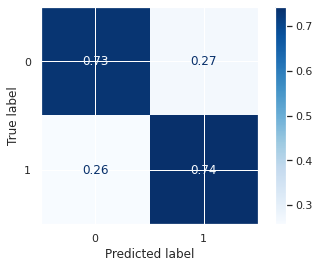

In [38]:
plot_confusion_matrix(model_cb, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

CatBoost - Statistical analysis

0:	learn: 0.6478543	total: 143ms	remaining: 28.5s
1:	learn: 0.6055721	total: 202ms	remaining: 20s
2:	learn: 0.5714269	total: 255ms	remaining: 16.8s
3:	learn: 0.5464725	total: 314ms	remaining: 15.4s
4:	learn: 0.5173811	total: 373ms	remaining: 14.5s
5:	learn: 0.4978077	total: 427ms	remaining: 13.8s
6:	learn: 0.4762658	total: 482ms	remaining: 13.3s
7:	learn: 0.4581493	total: 543ms	remaining: 13s
8:	learn: 0.4426409	total: 601ms	remaining: 12.8s
9:	learn: 0.4225456	total: 679ms	remaining: 12.9s
10:	learn: 0.4107139	total: 733ms	remaining: 12.6s
11:	learn: 0.3960987	total: 787ms	remaining: 12.3s
12:	learn: 0.3826959	total: 843ms	remaining: 12.1s
13:	learn: 0.3641639	total: 903ms	remaining: 12s
14:	learn: 0.3541082	total: 956ms	remaining: 11.8s
15:	learn: 0.3489836	total: 962ms	remaining: 11.1s
16:	learn: 0.3365232	total: 1.01s	remaining: 10.9s
17:	learn: 0.3285662	total: 1.07s	remaining: 10.9s
18:	learn: 0.3171184	total: 1.13s	remaining: 10.7s
19:	learn: 0.3069243	total: 1.18s	remaining: 10

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


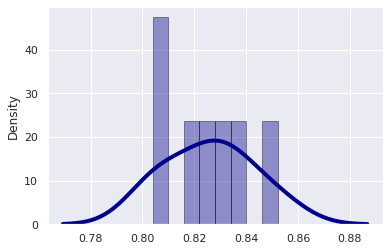

In [39]:
#del dataframe_analisys
hit_rates = cross_val_score(model_cb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_cb = hit_rates

### Random Forest - Create a GridSearch to identify the best classify

In [40]:

filename = 'best_model_rf.sav'

if run_grid_search_rf == True:
  # Create the parameter grid based on the results of random search 
  # parameters in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  param_grid = {
      'max_depth': [1, 6, 12],
      'bootstrap': [True, False],
      'n_estimators': [10, 100, 200],
      'min_samples_leaf': [1, 10, 20, 40],
      'ccp_alpha': [0.0, 0.4],
      'criterion': ['gini', 'entropy'],
      'max_features': ['sqrt', 'log2']
  }


  # Create a based model
  model_rf = RandomForestClassifier()
  # Instantiate the grid search model
  #https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py
  grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  
  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  
  grid_search.best_params_

  model_rf = grid_search.best_estimator_
  #save
  pickle.dump(model_rf, open(filename, 'wb'))
  files.download(filename)
else: 
  #load
  model_rf = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_rf)
y_pred_rf = model_rf.predict(X_test)

#Fitting 10 folds for each of 864 candidates, totalling 8640 fits

Parameters of best model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


RF - Accuracy, precision and Recall

In [41]:
y_pred = y_pred_rf
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.759136,0.773026,0.755627


RF - Confusio matrix

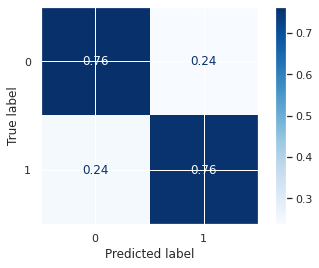

In [42]:
plot_confusion_matrix(model_rf, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

RF - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


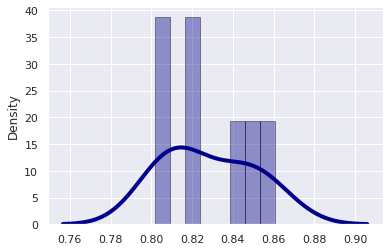

In [43]:

hit_rates = cross_val_score(model_rf, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_rf = hit_rates

### XGBoot - Create a GridSearch to identify the best classify

In [44]:
filename = 'best_model_xgb.sav'

if run_grid_search_xgb == True:
  # Create the parameter grid
  # parameters in https://xgboost.readthedocs.io/en/latest/parameter.html

  param_grid = {
          'max_depth': [1, 6, 12],
          'n_estimators': [10, 100, 200],
	        'min_samples_leaf': [1, 10, 20, 40],
          'booster': ['gbtree', 'gblinear', 'dart'],
          'sampling_method': ['uniform', 'gradient_based'],
          'tree_method': ['exact','approx','hist']
          }
  # Create a based model
  model_xgb = XGBClassifier()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_xgb, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_


  model_xgb = grid_search.best_estimator_
  #save
  pickle.dump(model_xgb, open(filename, 'wb'))
  files.download(filename)
else: 
  model_xgb = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_xgb)
y_pred_xgb = model_xgb.predict(X_test)



Parameters of best model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, min_samples_leaf=1, missing=nan,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=1,
              seed=None, silent=None, subsample=1, tree_method='approx',
              verbosity=1)


XGB - Accuracy, precision and recall

In [45]:
y_pred = y_pred_xgb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys



,Accuracy,Precision,Recall
0,0.752492,0.76129,0.758842


XGB - Confusion matrix

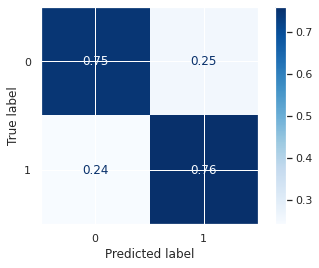

In [46]:
plot_confusion_matrix(model_xgb, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

XGB - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


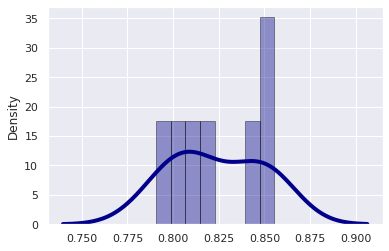

In [47]:
#del dataframe_analisys
hit_rates = cross_val_score(model_xgb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_xgb = hit_rates

### Gradiente Boosting

In [48]:
filename = 'best_model_gb.sav'

if run_grid_search_gb == True:
  # Create the parameter grid
  # parameters in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
  param_grid = {
      'max_depth': [1, 6, 12],
      'n_estimators': [10, 100, 200],
      'min_samples_leaf': [1, 10, 20, 40],
      'learning_rate': [0.1, 0.5],

      'loss': ['deviance', 'exponential'],
      'criterion': ['friedman_mse', 'mse', 'mae'],
      'max_features': [ 'sqrt', 'log2']
      }

  # Create a based model
  model_gb = GradientBoostingClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_gb, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')


  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_gb = grid_search.best_estimator_

  #save
  pickle.dump(model_gb, open(filename, 'wb'))
  files.download(filename)
else:
  model_gb = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_gb)
y_pred_gb = model_gb.predict(X_test)

#Fitting 10 folds for each of 972 candidates, totalling 9720 fits


Parameters of best model:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='mae', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=12,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


GB - Accuracy, precision and recall.

In [49]:
y_pred = y_pred_gb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.72093,0.742373,0.70418


GB - Confusion matrix

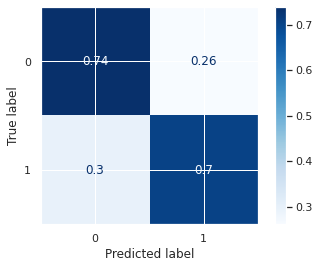

In [50]:
plot_confusion_matrix(model_gb, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

GB - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


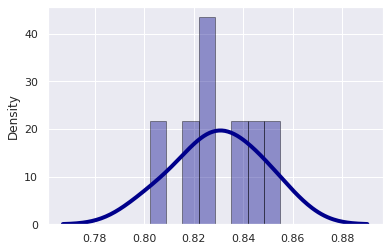

In [51]:


hit_rates = cross_val_score(model_gb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_gb = hit_rates

### Logistic Regression - Create a GridSearch to identify the best classify 

In [52]:
filename = 'best_model_lr.sav'

if run_grid_search_lr == True:
  # Create the parameter grid based on the results of random search 

  param_grid = {
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'penalty': ['l1', 'l2'],
      'C':[0.001,0.008,0.05,0.09,0.1],
      'max_iter':[50, 200, 400, 500,600]}


  # Create a based model
  model_lr = LogisticRegression()
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_lr, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), 
                            n_jobs = 3, 
                            verbose = 2,
                            scoring = 'roc_auc')


  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_lr = grid_search.best_estimator_
  #save
  pickle.dump(model_lr, open(filename, 'wb'))
  files.download(filename)
else: 
  #load
  model_lr = pickle.load(open(filename, 'rb'))

print('Parameters of best model:')
print(model_lr)
y_pred_lr = model_lr.predict(X_test)
#Fitting 10 folds for each of 112 candidates, totalling 1120 fits

Parameters of best model:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)


LR - Accuracy, precision and recall

In [53]:
y_pred = y_pred_lr
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.742525,0.8,0.66881


LR - Confusion matrix

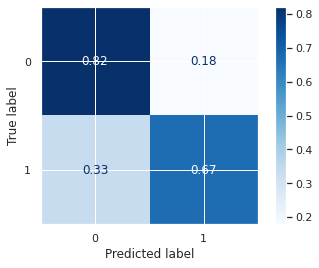

In [54]:
plot_confusion_matrix(model_lr, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

RL - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


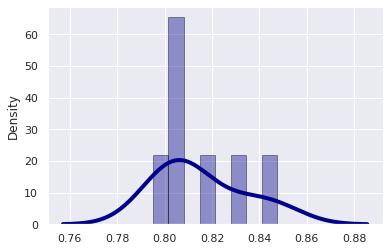

In [55]:
hit_rates = cross_val_score(model_lr, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_lr = hit_rates

### Decision Tree

In [56]:
filename = 'best_model_dt.sav'

if run_grid_search_dt == True:
  # Create the parameter grid
  # parameters in https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

  param_grid = { 
      'min_samples_leaf': [1, 10, 20, 40],
      'max_depth': [1, 6, 12],
      
      'criterion':['gini','entropy'],
      'splitter':['best', 'random'],
      'min_samples_split': [2, 5, 15, 20, 30]
      }

  # Create a based model
  model_dt = DecisionTreeClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_dt, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = -1, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_dt = grid_search.best_estimator_
  #save
  pickle.dump(model_dt, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_dt = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_dt)
y_pred_dt = model_dt.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Parameters of best model:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')


DT - Accuracy, precision and recall

In [57]:
y_pred = y_pred_dt
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.715947,0.759259,0.659164


DT - Confusion matrix

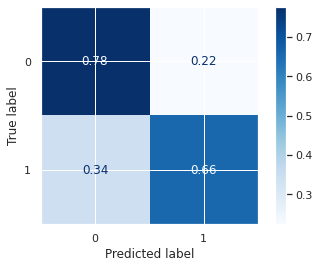

In [58]:
plot_confusion_matrix(model_dt, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

DT - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


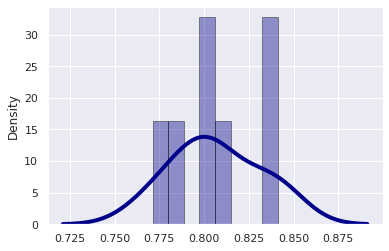

In [59]:

hit_rates = cross_val_score(model_dt, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_dt = hit_rates

### KNN

In [60]:
filename = 'best_model_knn.sav'

if run_grid_search_knn == True:
  # Create the parameter grid
  

  param_grid = { 
      'leaf_size':[1, 10, 20, 40],
      'algorithm':['ball_tree', 'kd_tree', 'brute'],
      'metric': ['str', 'callable','minkowski'],
      'n_neighbors':[2,4,6,8,10,12,14,16]
      }

  # Create a based model
  model_knn = KNeighborsClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_knn, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_knn = grid_search.best_estimator_
  #save
  pickle.dump(model_knn, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_knn = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_knn)
y_pred_knn = model_knn.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Parameters of best model:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


 KNN - Accuracy, precision and recall

In [61]:
y_pred = y_pred_knn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.686047,0.827957,0.495177


KNN - Confusion matrix

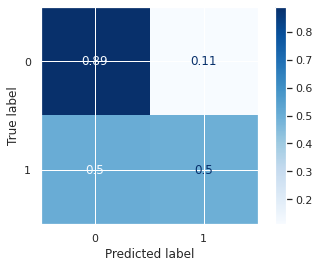

In [62]:
plot_confusion_matrix(model_knn, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

KNN - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


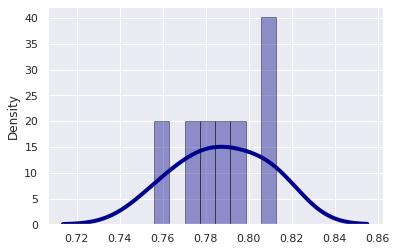

In [63]:

hit_rates = cross_val_score(model_knn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_knn = hit_rates

### Naive Bayes

In [64]:
filename = 'best_model_nb.sav'

if run_grid_search_nb == True:
  # Create the parameter grid
  

  param_grid = { 
      'var_smoothing':[1e-5, 1e-7, 1e-9, 1e-10,1e-12]
        }

  # Create a based model
  model_nb = GaussianNB()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_nb, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_nb = grid_search.best_estimator_
  #save
  pickle.dump(model_nb, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_nb = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_nb)
y_pred_nb = model_nb.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Parameters of best model:
GaussianNB(priors=None, var_smoothing=1e-05)


NB - Accuracy, precision and recall

In [65]:
y_pred = y_pred_nb
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.687708,0.786047,0.543408


NB - Confusion matrix

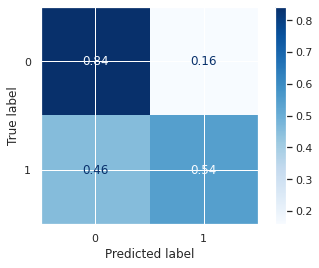

In [66]:
plot_confusion_matrix(model_nb, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

NB - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


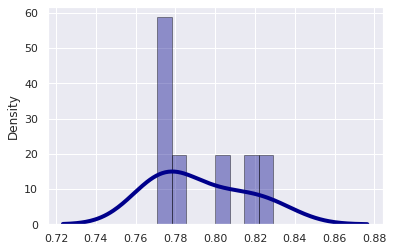

In [67]:

hit_rates = cross_val_score(model_nb, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nb = hit_rates

### Neural Network

In [68]:
filename = 'best_model_nn.sav'

if run_grid_search_nn == True:
  # Create the parameter grid
  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

  param_grid = {
                'learning_rate':['constant', 'invscaling', 'adaptive'],
                'solver':['lbfgs', 'sgd', 'adam'],
                'activation':['identity', 'logistic', 'tanh', 'relu'],
                'max_iter': [200,300,400],
                'alpha': [0.0001,0.0003],
                'hidden_layer_sizes':[1,2,3,4,5]
                }

  # Create a based model
  model_nn = MLPClassifier()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_nn, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_nn = grid_search.best_estimator_
  #save
  pickle.dump(model_nn, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_nn = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_nn)
y_pred_nn = model_nn.predict(X_test)

#Fitting 10 folds for each of 800 candidates, totalling 8000 fits

Parameters of best model:
MLPClassifier(activation='tanh', alpha=0.0003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


NN - Accuracy, precision and recall

In [69]:
y_pred = y_pred_nn
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.742525,0.786765,0.688103


NN - Confusion matrix

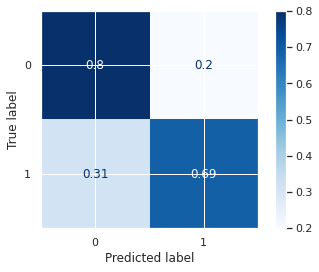

In [70]:
plot_confusion_matrix(model_nn, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

NN - Statistical analysis

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


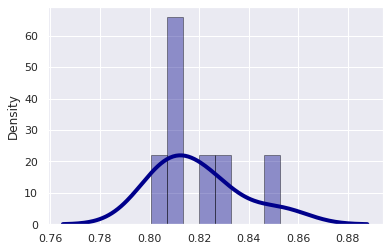

In [71]:

hit_rates = cross_val_score(model_nn, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_nn = hit_rates

### SVM

In [72]:
filename = 'best_model_svm.sav'

if run_grid_search_svm == True:
  # Create the parameter grid


  param_grid = {
        'C':[0.001, 0.01, 0.1, 1, 10],
        'kernel':['linear', 'poly', 'sigmoid'],
        'shrinking':[True, False],
        'degree':[1,2,3,4,5]
        }

  # Create a based model
  model_svm = svm.SVC()

  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = model_svm, param_grid = param_grid, 
                            cv = StratifiedKFold(cv_grid_search), n_jobs = 3, verbose = 2,scoring = 'roc_auc')

  # Fit the grid search to the data
  grid_search.fit(X_train, y_train)
  grid_search.best_params_

  model_svm = grid_search.best_estimator_
  #save
  pickle.dump(model_svm, open(filename, 'wb'))
  files.download(filename)
else:
  #load
  model_svm = pickle.load(open(filename, 'rb'))
  
print('Parameters of best model:')
print(model_svm)
y_pred_svm = model_svm.predict(X_test)



Parameters of best model:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


SVM - Accuracy, precision and recall

In [73]:
y_pred = y_pred_svm
d = {'Accuracy': [accuracy_score(y_test, y_pred)],
     'Precision': [precision_score(y_test, y_pred)],
     'Recall': [recall_score(y_test, y_pred)]}
dataframe_analisys = pd.DataFrame(data=d)
dataframe_analisys

,Accuracy,Precision,Recall
0,0.742525,0.822314,0.639871


SVM - Confusion matrix

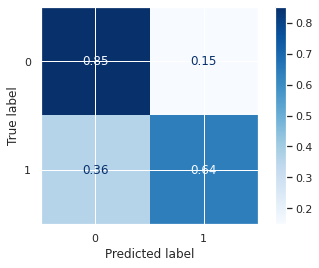

In [74]:
plot_confusion_matrix(model_svm, X_test, y_test,display_labels=['0','1'], cmap=plt.cm.Blues,normalize='true')
plt.show()

SVM - Statistical analysis

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


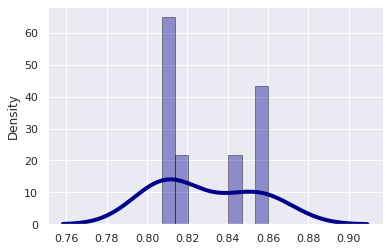

In [75]:

hit_rates = cross_val_score(model_svm, X_train, y_train, cv=StratifiedKFold(crossvalidation),scoring = 'roc_auc')

sns.distplot(hit_rates, hist=True, kde=True, 
             bins=8, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
hit_rates_svm = hit_rates

## - Models comparation;


Density


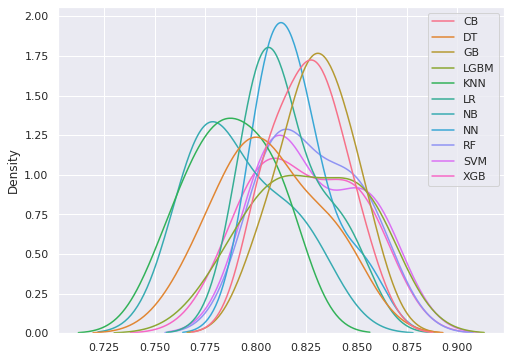

Friedman Test
FriedmanchisquareResult(statistic=31.715399610136473, pvalue=0.0004465821712576912)


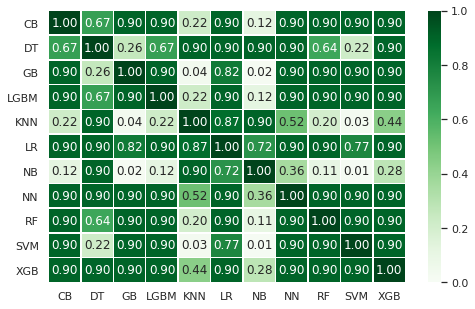

In [76]:
print('Density')

dt_tmp = {
          'CB':hit_rates_cb,
          'DT':hit_rates_dt,
          'GB':hit_rates_gb,
          'LGBM':hit_rates_lgbm,
          'KNN':hit_rates_knn,
          'LR':hit_rates_lr,
          'NB':hit_rates_nb,
          'NN':hit_rates_nn,
          'RF':hit_rates_rf,
          'SVM':hit_rates_svm,
          'XGB':hit_rates_xgb
          }

dt_tmp = pd.DataFrame(dt_tmp)

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=dt_tmp,legend=True,bw_method=0.7)

plt.show()

a = [hit_rates_cb.tolist(),
     hit_rates_dt.tolist(),
     hit_rates_gb.tolist(), 
     hit_rates_lgbm.tolist(),
     hit_rates_knn.tolist(), 
     hit_rates_lr.tolist(),
     hit_rates_nb.tolist(),
     hit_rates_nn.tolist(),
     hit_rates_rf.tolist(),
     hit_rates_svm.tolist(),
     hit_rates_xgb.tolist()]


print('Friedman Test')
print(friedmanchisquare(*a))
posthoc = sp.posthoc_nemenyi_friedman(list(map(list, zip(*a))))
models_names = ['CB','DT','GB','LGBM','KNN','LR','NB','NN','RF','SVM','XGB']
fig, ax = plt.subplots(figsize=(8,5)) 
ax = sns.heatmap(
    posthoc, vmin=0, 
    vmax=1, xticklabels=models_names,
    yticklabels=models_names,
    cmap="Greens",linewidths=.5,
    annot=True,fmt='.2f')
#plt.savefig('matrix.png')
plt.show()

Density


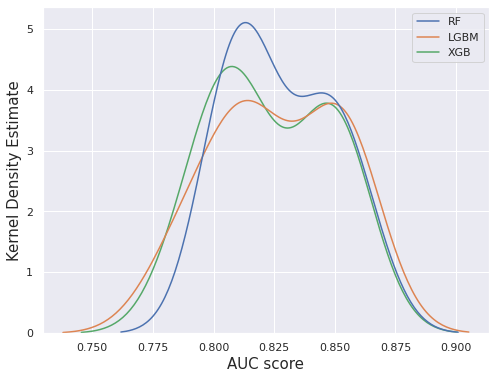

Friedman Test
FriedmanchisquareResult(statistic=31.715399610136473, pvalue=0.0004465821712576912)


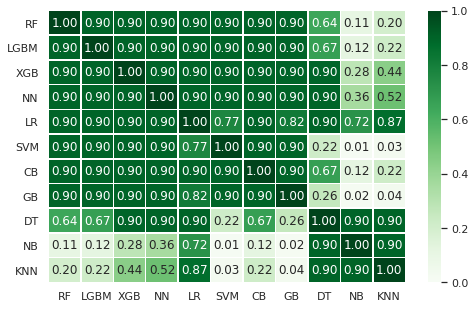

In [77]:
print('Density')

dt_tmp = {
          'RF':hit_rates_rf,
          'LGBM':hit_rates_lgbm,
          'XGB':hit_rates_xgb
          }

dt_tmp = pd.DataFrame(dt_tmp)

fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('AUC score', fontsize=15)
plt.ylabel('Kernel Density Estimate', fontsize=15)
sns.kdeplot(data=dt_tmp,legend=True,bw_method=0.6)

plt.show()

a = [hit_rates_rf.tolist(),
     hit_rates_lgbm.tolist(),
     hit_rates_xgb.tolist(),
     hit_rates_nn.tolist(),
     hit_rates_lr.tolist(),
     hit_rates_svm.tolist(),
     hit_rates_cb.tolist(),
     hit_rates_gb.tolist(),
     hit_rates_dt.tolist(),
     hit_rates_nb.tolist(),
     hit_rates_knn.tolist()
    ]


print('Friedman Test')
print(friedmanchisquare(*a))
posthoc = sp.posthoc_nemenyi_friedman(list(map(list, zip(*a))))
models_names = ['RF','LGBM','XGB','NN','LR','SVM','CB','GB','DT','NB','KNN']
fig, ax = plt.subplots(figsize=(8,5)) 
ax = sns.heatmap(
    posthoc, vmin=0, 
    vmax=1, xticklabels=models_names,
    yticklabels=models_names,
    cmap="Greens",linewidths=.5,
    annot=True,fmt='.2f')
#plt.savefig('matrix.png')
plt.show()

## - Information Gain (Global);

Funções utilizadas

In [78]:



def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


################### 
    
###################


def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain



Ganho de Informação - Ranque de atributos

No handles with labels found to put in legend.


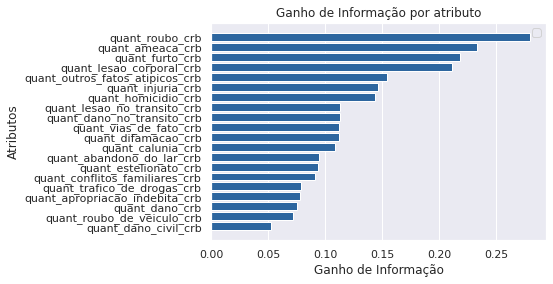

In [79]:
#Extraindo ganho de informacao de atributos
information_gain = pd.Series([InfoGain(df,feature,y_feature_name) for feature in x_features_names], index=x_features_names).sort_values(ascending=False)

df_Pred2Town_feature_rank['info_gain_ent'] = information_gain.index[:]
att_count = 20
sns.barplot(x=information_gain[0:att_count], y=information_gain.index[0:att_count], color = (0.1, 0.4, 0.7, 0.6)) #Criando bar plot
plt.xlabel('Ganho de Informação')
plt.ylabel('Atributos')
plt.title("Ganho de Informação por atributo")
plt.legend()
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()

## - Attribute importance (Global);

No handles with labels found to put in legend.


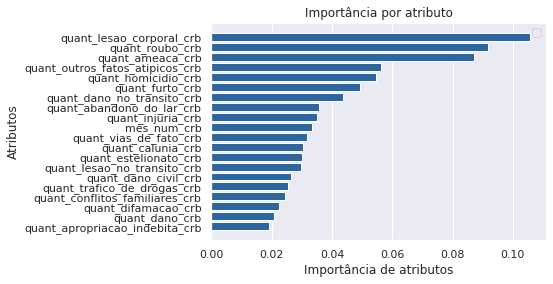

In [80]:

#Extracting importance from attributes of the Random Forest model
feature_imp = pd.Series(model_rf.feature_importances_,index=x_features_names).sort_values(ascending=False) 

df_Pred2Town_feature_rank['feat_imp_oob'] = feature_imp.index[:]

sns.barplot(x=feature_imp[0:att_count], y=feature_imp.index[0:att_count], color = (0.1, 0.4, 0.7, 0.6)) #Criando bar plot
plt.xlabel('Importância de atributos')
plt.ylabel('Atributos')
plt.title("Importância por atributo")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend()
plt.show()
